## Legend Generator for Figure 3
Runs the code for the NLSL example, then generates the legend from the results

In [1]:
%load_ext autoreload
%autoreload 2

# Third-Party Imports
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib as mpl

# Paclage imports
from sindy_bvp import SINDyBVP
from sindy_bvp.differentiators import FiniteDifferences

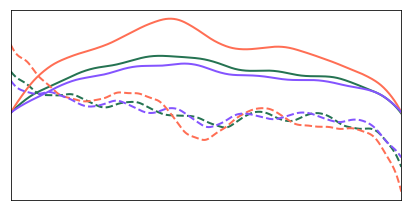

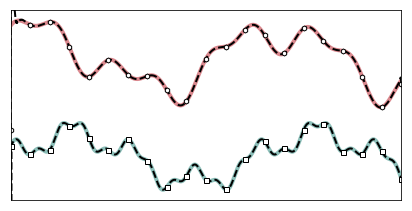

Learned function for d^{2}u/dx^{2} includes: ['u', 'u^{2}', 'du/dx', 'f']
L2 p error: 0.0004
L2 q error: 0.0044
Wall time: 9.31 s


In [2]:
%%time

outcome_var = 'd^{2}u/dx^{2}'

# Known Operator Case
sbvp_ko = SINDyBVP(file_stem = "./data/S2-NLSL-",
                num_trials = 6,
                differentiator = FiniteDifferences(diff_order = 2),
                outcome_var = outcome_var,
                noisemaker = None,
                known_vars = ['u', 'u^{2}', 'du/dx', 'f'],
                dep_var_name = 'u',
                ind_var_name = 'x')

coeffs, plotter = sbvp_ko.sindy_bvp()

# Generate the analysis plots: ODE solutions (first 3), p(x) and q(x), and u_xx model coefficients (entries in Xi)
plotter.generate_analysis_plots(save_stem=None, 
                                coeff_ylims=[-1,3])

print("Learned function for", outcome_var ,"includes:", list(coeffs))

# Score coefficients
plotter.score_coefficients()

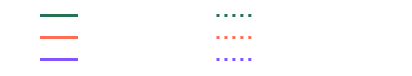

In [3]:
# Legend for Solutions

# Collect some useful attributes from Plotter
x_vector = plotter.true_x_vector
fs = plotter.figsize
ode_colors = plotter.ode_colors
reg_opts = plotter.reg_opts
true_opts = plotter.true_opts
lcolors = plotter.coeff_colors
markers = plotter.markers


num_colors_to_show = 3
# get the solid lines
custom_lines = [Line2D([0], [0], color=lc, lw=3) for lc in ode_colors][:num_colors_to_show]
# and the corresponding dotted lines
custom_lines += [Line2D([0], [0], color=lc, linestyle=":", lw=3) for lc in ode_colors][:num_colors_to_show]
# create labels (no label) for the lines
labels = ['']*len(custom_lines)

# create an Axes to place legend on

fig = plt.figure(figsize=(fs[0],1))
ax = plt.gca()
# Legend placement
mpl.rcParams["legend.markerscale"] = 1.5
mpl.rcParams["legend.labelspacing"] = 1.2
mpl.rcParams["legend.handlelength"] = 3.5
mpl.rcParams["legend.handletextpad"] = 12
ax.legend(custom_lines, labels, frameon=False, loc='center', ncol=2,)
# Remove labels from axes
ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax.tick_params(axis='y', which='both', left=False, labelleft=False)
for spine in list(ax.spines):
    ax.spines[spine].set_visible(False)
# Save figure
plt.savefig('./Figs/3-sol-legend.svg', dpi=600, transparent=True)

# Show all the plots (pyplot command)
plt.show()

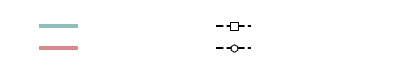

In [4]:
# Legend for Regressed vs True Coefficients

num_colors_to_show = 2
# get the solid lines
custom_lines = [Line2D([0], [0], color=lc, **true_opts) for lc in lcolors][:num_colors_to_show]
# and the corresponding dotted lines
custom_lines += [Line2D([0], [0], marker=mk, **reg_opts) for mk in markers][:num_colors_to_show]
# create labels (no label) for the lines
labels = ['']*len(custom_lines)

# create an Axes to place legend on

fig = plt.figure(figsize=(fs[0],1))
ax = plt.gca()
# Legend placement
mpl.rcParams["legend.markerscale"] = 1.5
mpl.rcParams["legend.labelspacing"] = 1.2
mpl.rcParams["legend.handlelength"] = 3.5
mpl.rcParams["legend.handletextpad"] = 12
ax.legend(custom_lines, labels, frameon=False, loc='center', ncol=2,)
# Remove labels from axes
ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax.tick_params(axis='y', which='both', left=False, labelleft=False)
for spine in list(ax.spines):
    ax.spines[spine].set_visible(False)
# Save figure
plt.savefig('./Figs/3-pq-legend.svg', dpi=600, transparent=True)

# Show all the plots (pyplot command)
plt.show()